<h1><center>Laboratorio 3: La desperación de Mr. Cheems 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>

### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Josefa Anselmo
- Nombre de alumno 2: Tamara Carrasco


### **Link de repositorio de GitHub:** [TamoJosha](https://github.com/Tamaracarrasco/TamoJosha-Lab-de-Prog-MDS-Prim2025)

## Temas a tratar
- Aplicar Pandas para obtener características de un DataFrame.
- Aplicar Pipelines y Column Transformers

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio
- Comprender cómo aplicar pipelines de Scikit-Learn para generar procesos más limpios en Feature Engineering.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
import datetime
from IPython.display import HTML

# Libreria para plotear (En colab esta desactualizado plotly)
!pip install --upgrade plotly
import plotly.express as px
import plotly.graph_objects as go

# Librerias utiles
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


# Feature engineering en datos de retail 🛍️

### 0. Cargar Dataset

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

Mr. Cheems, gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas. En una reunión, Mr Cheems le comenta que la calidad de sus datos no es muy buena, por lo que le solicita a usted que limpie su base de datos y cree nuevos atributos relevantes para el negocio.

Por ello, el área de ventas les entrega archivo llamado `online_retail_data.pickle` el cual usted decide cargar a continuación.

In [3]:
# Inserte su código aquí
df_retail = pd.read_pickle("online_retail_data.pickle")

df_retail.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,ID489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,ID489434,79323P,PINK CHERRY LIGHTS,12.0,NaT,6.75,13085.0,United Kingdom
2,ID489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,ID489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,ID489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df_retail["Price"].describe()

count    392591.000000
mean          3.309850
std          35.407209
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       10953.500000
Name: Price, dtype: float64

### 1. Función para explorar características [0.5 puntos]

<p align="center">
  <img width=300 src="https://editor.analyticsvidhya.com/uploads/47389meme.png">
</p>




Tras inspeccionar brevemente los datos proporcionados, usted decide crear una función que realice lo siguiente:
- Plotee un histograma para las variables precios y cantidad. [0.3 puntos]
- Imprima un conteo de datos nulos por variable [0.2 puntos]

**Nota**: Para generar los gráficos no es obligatorio el uso de `plotly`, pero si es altamente recomendado. Pueden encontrar más información de esta librería en este [enlace](https://plotly.com/python/).

**Respuesta:**

In [53]:
import matplotlib.pyplot as plt


def explore_data(dataframe_in, scale="log"):
  """
  Función que retorna un histograma de las variables Price y Quantity de un dataframe que
  contenga esas columnas.

  Se modifica los input se esta función para agregar el parámetro scale, ya que hubo
  problemas para graficar con plotly.

  Parametros:
  -------------
  dataframe_in: dataframe que contiene las columnas numéricas Price y Quantity

  scale: indica la escala en que se representará el eje y. Default es "log". 
  Si no quiere transformaciones de los ejes: usar scale="no".

  """
  # valores nulos
  print("===== Valores nulos por columna =====")
  print(" Variable     | Cantidad de valores nulos ")
  print(dataframe_in.isna().sum())

  # gráficos
  # Con matplotlib: sacamos los nan de cada columna

  if scale=="log":
      plt.figure(1, figsize=(8,6))
      plt.hist(dataframe_in["Price"].dropna(), bins=30, edgecolor="black", color="skyblue")
      plt.title("Distribución del Precio")
      plt.xlabel("Price (Precio)")
      plt.ylabel("Frecuencia")
      plt.yscale(scale)
    

      plt.figure(2, figsize=(8,6))
      plt.hist(dataframe_in["Quantity"].dropna(), bins=30, edgecolor="black", color="skyblue")
      plt.title("Distribución de la Cantidad")
      plt.xlabel("Quantity (Cantidad)")
      plt.ylabel("Frecuencia")
      plt.yscale(scale)
      plt.show()
    
  else: # scale="no"
      plt.figure(1, figsize=(8,6))
      plt.hist(dataframe_in["Price"].dropna(), bins=30, edgecolor="black", color="skyblue")
      plt.title("Distribución del Precio")
      plt.xlabel("Price (Precio)")
      plt.ylabel("Frecuencia")
    

      plt.figure(2, figsize=(8,6))
      plt.hist(dataframe_in["Quantity"].dropna(), bins=30, edgecolor="black", color="skyblue")
      plt.title("Distribución de la Cantidad")
      plt.xlabel("Quantity (Cantidad)")
      plt.ylabel("Frecuencia")
      
      plt.show()
  




  # NO ME RESULTA CON PLOTLY wtf
  # fig1 = px.histogram(dataframe_in, x="Price", nbins=1, log_y=True)
  # fig2 = px.histogram(dataframe_in, x="Quantity", nbins=20)
  # fig1.show()
  # fig2.show()



===== Valores nulos por columna =====
 Variable     | Cantidad de valores nulos 
Invoice           0
StockCode         0
Description       0
Quantity       7915
InvoiceDate    9308
Price          8356
Customer ID       0
Country        8164
dtype: int64


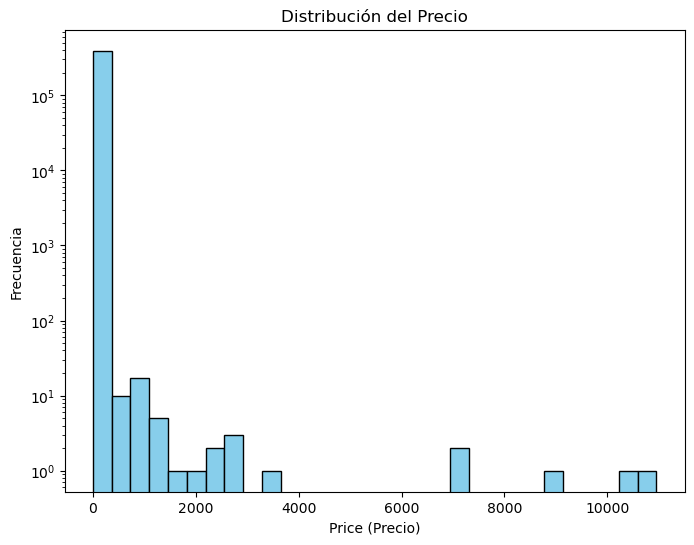

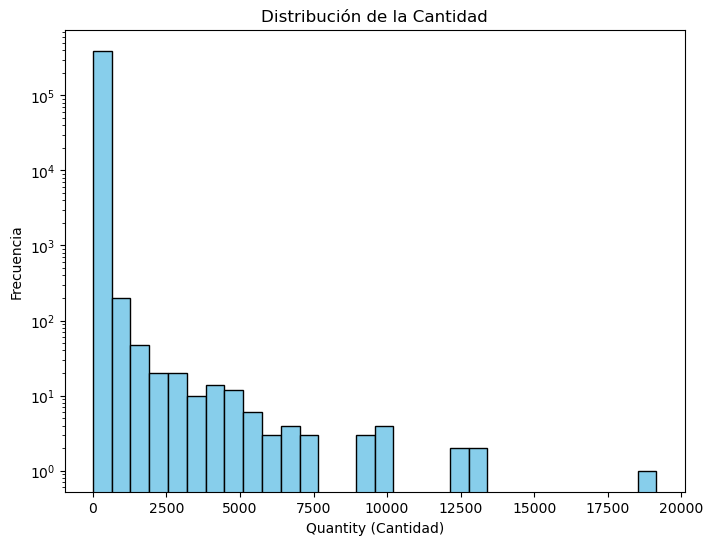

In [54]:
# histogramas con eje y en log
explore_data(df_retail)
# Comentarios: Se supone que plotly maneja bien los valores nulos. Creo que no se ve el histograma por el tema de los outliers
# pero plt.histogram lo maneja bien (aunque se dropean los outliers de las columnas en cuestíon)

===== Valores nulos por columna =====
 Variable     | Cantidad de valores nulos 
Invoice           0
StockCode         0
Description       0
Quantity       7915
InvoiceDate    9308
Price          8356
Customer ID       0
Country        8164
dtype: int64


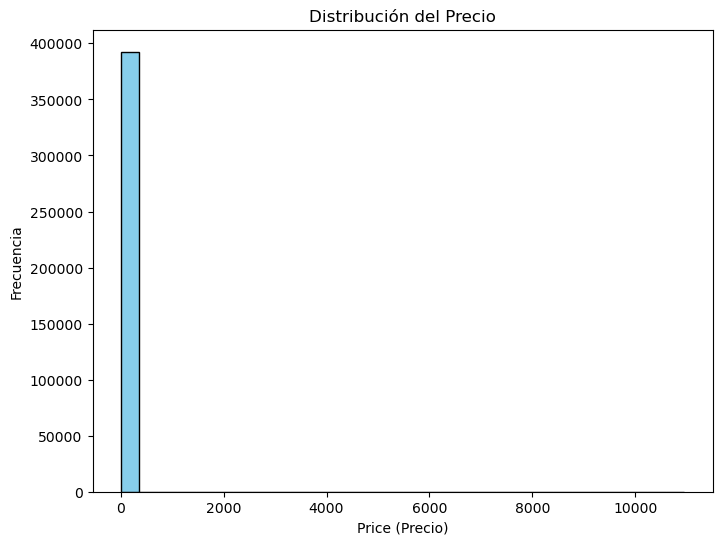

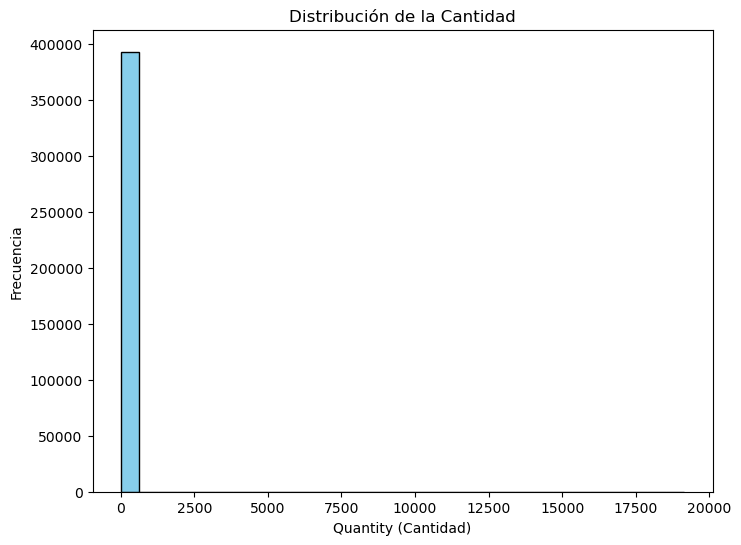

In [55]:
# histogramas sin trasnformaciones

explore_data(df_retail, scale="no")

### 2. Eliminando outliers [1.0 puntos]

<p align="center">
  <img width=300 src="https://media.licdn.com/dms/image/C5612AQGdXKCka7HumA/article-cover_image-shrink_600_2000/0/1520056407281?e=2147483647&v=beta&t=VZcfjjzjK4LxXdZkSu1KisWC0Ry8bk4tPCn3R8aYdNM">
</p>




#### 2.1 Creando la clase IQR [0.5 puntos]

Entre las falencias de los datos, Mr. Cheems le comenta que a veces los operadores no ingresan el precio correcto de los productos. Mr. Cheems le comenta que se dio cuenta de este fenómeno porque hay productos con precios exagerádamente altos o bajos. Por lo cual usted decide eliminar outliers del dataframe a traves del rango intercuartil el cual cuenta con los siguientes pasos:

1. Calcular el primer cuartil $Q1$ y el tercer cuartil $Q3$. Hint: utilice el método `quantile()`

2. Calcular el rango intercuartil (RIC): $RIC = Q3 - Q1$

3. Calcular los límites para identificar outliers:
 - Límite inferior: $~~Q1 - \lambda \cdot RIC$
 - Límite superior: $~~Q3 + \lambda \cdot RIC$

4. Eliminar outliers: Los outliers son los datos que están por debajo del límite inferior o por encima del límite superior.


Para realizar dicha tarea, usted decide crear una clase llamada `IQR()` utilizando `BaseEstimator` y `TransformerMixin` para realizar una transformación de cada una de las columnas numéricas del DataFrame utilizando `ColumnTransformer()` más tarde. Considere que lambda debe ser $\lambda$ un parámetro a definir por el usuario.

**Hint:** tome como referencia el siguiente [enlace](https://sklearn-template.readthedocs.io/en/latest/user_guide.html#transformer).

**Nota:** No modificar el método set_output de la clase IQR

**Respuesta:**

In [58]:
class IQR(BaseEstimator, TransformerMixin):

  def __init__(self, cte=1.5):
    self.cte = cte # cte representa lambda que define el usuario
    pass

  def fit(self, X, y=None): # Acá se aplica lo de la guía

    # hay que obtener columnas 
    self.num_columns = X.columns # lista de columnas del dataframe: por como será el pipeline, deberian ser las columnas numéricas

    # No es necesario self.X = X ya que no se busca guardar el dataframe, solo calcular los límites

    self.q1 = X[self.num_columns].quantile(0.25)
    self.q3 = X[self.num_columns].quantile(0.75)
    self.ric = self.q3 - self.q1

    self.lim_inf = self.q1 - self.ric*self.cte
    self.lim_sup = self.q3 + self.ric*self.cte

    return self
    

  def transform(self, X): # de lo que entendí de la guía es que acá, X se transforma con lo que aprendió en fit (los límites), o sea acá se sacan los outliers
    
    X_no_outlier = X.copy()
    
    filtrado = ((X_no_outlier[self.num_columns] >= self.lim_inf) & (X_no_outlier[self.num_columns] <= self.lim_sup)).all(axis=1) 
    # la linea de arriba se obtiene un  dataframe donde hay valores booleanos. usar .all(axis=1) solo se filtran las filas donde
    # se cumple la condición ( o sea donde haya True)
    
    # acá estaba usando self.X primero y no X_no_outlier y eso no está bien pq se debería usar el X que recibe transform, no el q se guarda en fit
    return X_no_outlier[filtrado]

  def set_output(self,transform='default'):
    #No modificar esta función
    return self

#### 2.2 Creación del Pipeline [0.5 puntos]

Para comenzar introduciéndose en el uso de pipeline, usted decide definir un pipeline con el Transformer previamente definido. Además, usted decide visualizar cómo cambia la distribución de las variables Precio y Cantidad antes y despues de aplicar IQR. Para ello, usted aplica los siguientes pasos:

- Definir un pipeline llamado `numeric_transformations` para las variables precio y cantidad con la transformación IQR. [0.1 puntos]
- Defina un column transformer que aplique `numeric_transformations` para las variables numéricas y `passthrough` para las variables categóricas. Adicionalmente, fije el parámetro `verbose_feature_names_out` en `False`. Ver hint al final [0.1 puntos]
- Defina el dataframe `df_iqr` aplicado el column transformer a los datos proporcionados por Mr. Cheems considerando un valor de $\lambda$ que tenga un desempeño aceptable para ambas variables. [0.1 puntos]
- Usar `explore_data` en `df_retail` y en `df_iqr`.  [0.1 puntos]
- Reportar los cambios observados en la distribución de las variables. ¿Qué sucede al aumentar el valor de lambda? [0.1 puntos]


**Hint:** El transformador `passthrough` está predefinido y es una opción que puedes usar para las columnas que no deseas transformar. Al especificar 'passthrough' para una parte de tu ColumnTransformer, las columnas correspondientes pasarán a través del ColumnTransformer sin ninguna modificación. El siguiente [enlace](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) le puede ser útil.

**Nota:** Mantenga el método set_output del column transformer con la transformación `pandas` para obtener un dataframe una vez aplicado el column transformer.

**Respuesta:**

Apóyese de la siguiente estructura para su respuesta:

===== Valores nulos por columna =====
 Variable     | Cantidad de valores nulos 
Invoice           0
StockCode         0
Description       0
Quantity       7915
InvoiceDate    9308
Price          8356
Customer ID       0
Country        8164
dtype: int64


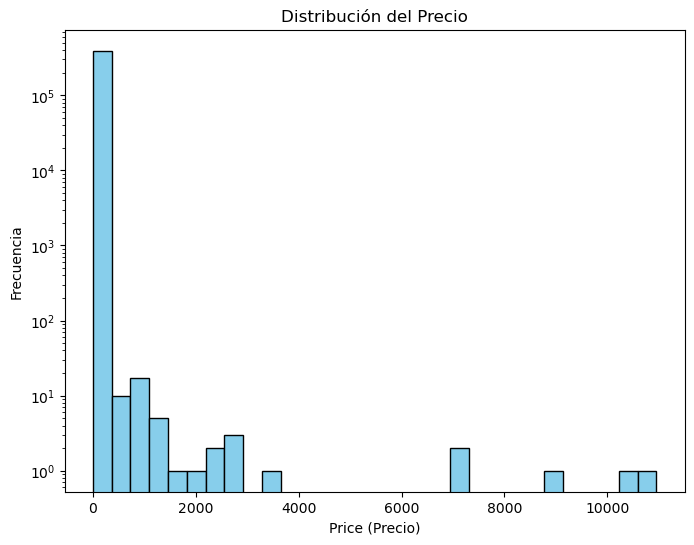

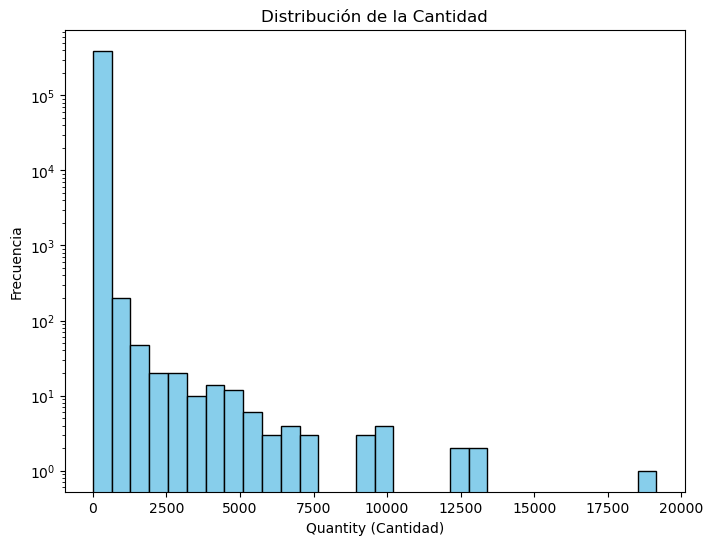

===== Valores nulos por columna =====
 Variable     | Cantidad de valores nulos 
Quantity       72433
Price          72433
Invoice            0
StockCode          0
Description        0
InvoiceDate     9308
Customer ID        0
Country         8164
dtype: int64


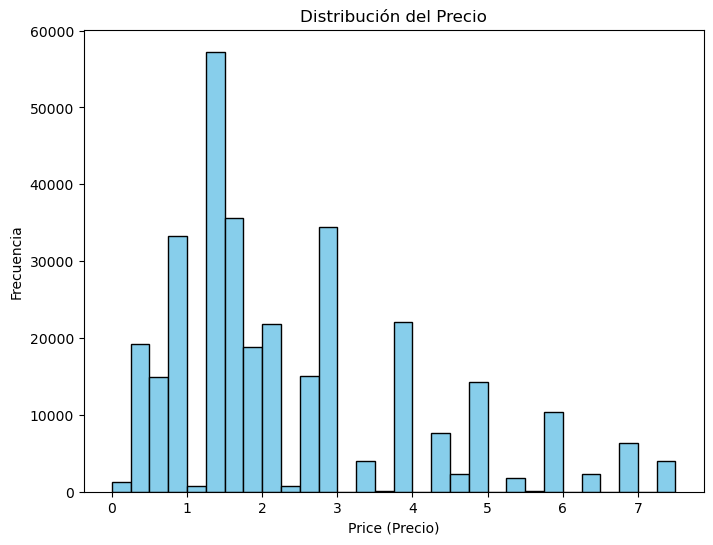

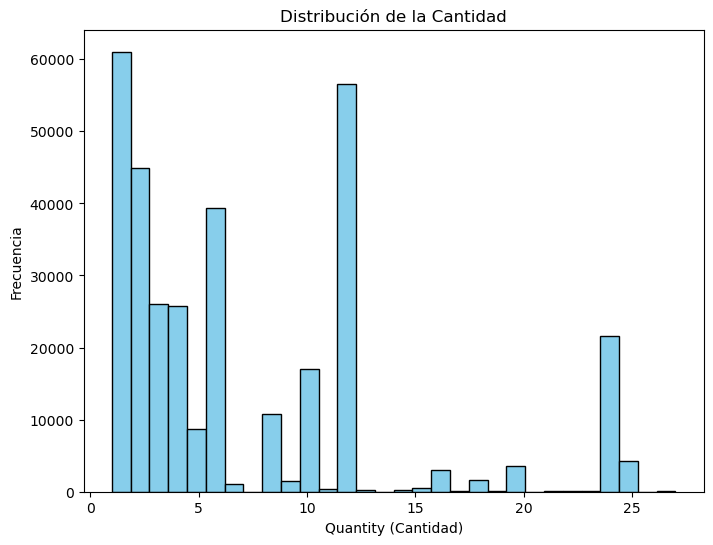

===== Valores nulos por columna =====
 Variable     | Cantidad de valores nulos 
Quantity       72433
Price          72433
Invoice            0
StockCode          0
Description        0
InvoiceDate     9308
Customer ID        0
Country         8164
dtype: int64


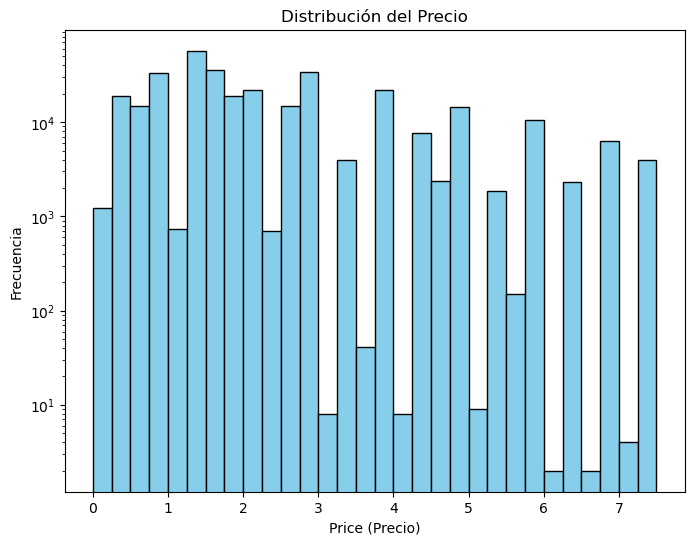

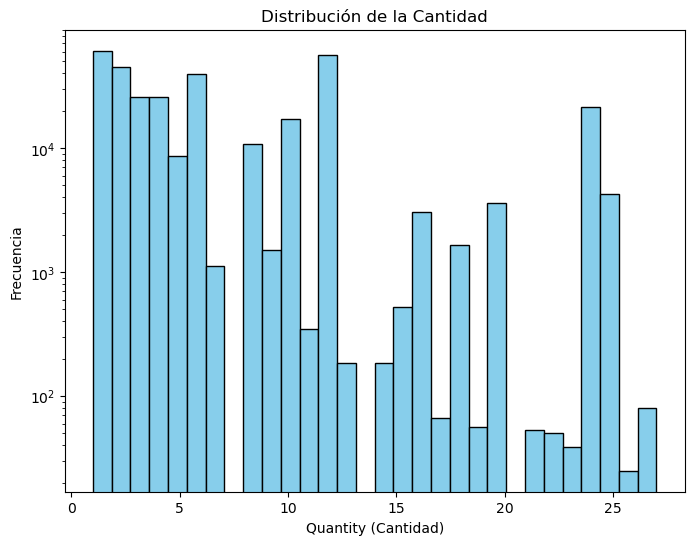

In [64]:
# Definicion las variables que pasarán por cada pipeline
numerical_columns = ["Quantity", "Price"]
categorical_columns = ["Invoice", "StockCode" ,"Description", "InvoiceDate", "Customer ID" ,"Country"]

# Definicion del pipeline
numeric_transformations = Pipeline([("iqr_transformer", IQR(cte=1.5))]) # el pipe espera una lista con tuplas (nombre, transformador)

# ColumnTransformer
column_transformer = ColumnTransformer([('numerical', numeric_transformations, numerical_columns),
                                        ('categorical', "passthrough", categorical_columns) # acá se pudo haber usado remainder si es que
                                        ],                                                    # no se especificaban las variables no numéricas 
                                        verbose_feature_names_out=False)

column_transformer.set_output(transform='pandas')

# Aplicamos ColumnTransformer a los datos

df_iqr = column_transformer.fit_transform(df_retail) # .fit() devuelve objeto entrenado no el dataframe trasnformado, por eso se usa fit_trasnform y no .fit

# Gráficos

explore_data(df_retail)
explore_data(df_iqr, scale="no")
explore_data(df_iqr, scale="log")

In [61]:
df_iqr.isna().sum()

Quantity       72433
Price          72433
Invoice            0
StockCode          0
Description        0
InvoiceDate     9308
Customer ID        0
Country         8164
dtype: int64

*Reporte los cambios observados aquí.*

### 3. Agregando un imputer al pipeline [1.0 puntos]



<p align="center">
  <img width=300 src="https://media.makeameme.org/created/hmm-there-is.jpg">
</p>

Para continuar con la limpieza del dataframe usted decide imputar los datos nulos de las variables numéricas, para lo cual decide realizar las siguientes tareas:

1. Crear un pipeline para variables categóricas llamado `categoric_transformations` con un paso llamado `mode_imputer`, en el cual se imputen los datos faltantes por la categoría más frecuente.
2. Agregar al pipeline `numeric_transformations` un paso llamado `mean_imputer`, en el cual se imputen los datos por la media usando [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) [0.1 puntos]
3. Crear y aplicar un `ColumnTransformer` actualizado con los pipelines `categoric_transformations` y `numeric_transformations` a `df_retail`, creando un dataframe llamado `df_mean_imputer`. [0.1 puntos]
4. Comparar los resultados de `explore_data` en `df_mean_imputer` y `df_iqr`. ¿Qué diferencias observa en la distribución de los datos? [0.2 puntos]
5. Cambiar el imputer de `numeric_transformations` por [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) y definir un nuevo dataframe llamado `df_knn_imputer`, aplicando el nuevo ColumnTransformer a `df_retail`. En caso de los tiempos de ejecución sean altos puede probar a reducir el parámetro `n_neighbors`. [0.1 puntos]
6. Comparar los resultados de `explore_data` en `df_knn_imputer` y `df_iqr`. ¿Qué diferencias observa en la distribución de los datos? [0.2 puntos]
7. Comparar los resultados de `explore_data` en `df_knn_imputer` y `df_mean_imputer`. ¿Cuál método de imputación es mejor? Deje el método escogido en el ColumnTransformer. [0.2 puntos]

**Nota: Fije el parámetro verbose_feature_names_out en `False` y utilice el método set_output con transformación `pandas` en cada ColumnTransformer para obtener como salida un dataframe.**

**Respuesta:**

In [ ]:
# Escriba su respuesta aquí

*Escriba su respuesta aquí*

### 4. Creación de nuevas features [2.0 puntos]

<p align="center">
  <img width=250 src="https://miro.medium.com/max/1000/1*JtTWgAcfVTWV8OTjT47Atg.jpeg">
</p>


#### 4.1 Definicion de LRMFP [1.0 puntos]

Dado que Mr. Lepin está interesado en obtener nuevos atributos relevantes para su negocio, su equipo de expertos sugiere la construcción de variables **LRMFP**, las que se construyen en base a las siguientes definiciones:

- **Length (L)**: Intervalo de tiempo, en días, entre la primera y la última visita del cliente. Mientras mas grande sea el valor, mas fiel es el cliente.

- **Recency (R)**: Indica hace cuanto tiempo el cliente realizo su ultima compra. Notar que para este caso, mientras mas grande es el valor, menos interes posee el usuario para repetir una compra en uno de los locales. **Considere "hoy" como la fecha mas reciente del dataset**.

- **Monetary (M)**: El término "monetario" se refiere a la cantidad media de dinero gastada por cada visita del cliente durante el período de observación y refleja la contribución del cliente a los ingresos de la empresa.

- **Frequency (F)**: Se refiere al número total de visitas del cliente durante el periodo de observación. Cuanto mayor sea la frecuencia, mayor será la fidelidad del cliente.

- **Periodicity (P)**: Representa si los clientes visitan las tiendas con regularidad.

$$Periodicity(n)=std(IVT_1, ..., IVT_n)$$

Donde $IVT$ denota el tiempo entre visitas y n representa el número de valores de tiempo entre visitas de un cliente.


$$IVT_i=date\_diff(t_{i+1},t)$$

En base a las definiciones señaladas, diseñe una función que permita obtener las características **LRMFP** recibiendo un DataFrame como entrada. Para esto, no estará permitido el uso de iteradores, utilice todas las herramientas que les ofrece `pandas` para realizar esto.

Una referencia que le puede ser útil es el [documento original](https://www.researchgate.net/publication/315979555_LRFMP_model_for_customer_segmentation_in_the_grocery_retail_industry_a_case_study) en donde se propone este método.

**<u>Formato</u> del Resultado Esperado:**

| Customer ID | Length | Recency | Frequency | Monetary | Periodicity |
|------------:|-------:|--------:|----------:|---------:|------------:|
|   12346.0   |    294 |      67 |        46 |   -64.68 |        37.0 |
|   12347.0   |     37 |       3 |        71 |  1323.32 |         0.0 |
|   12349.0   |    327 |      43 |       107 |  2646.99 |        78.0 |
|   12352.0   |     16 |      11 |        18 |   343.80 |         0.0 |
|   12356.0   |     44 |      16 |        84 |  3562.25 |        12.0 |

**Respuesta:**

In [ ]:
def custom_features(dataframe_in):
    pass

#### 4.2 Agregando las custom features [1.0 puntos]

Ahora, usted decide agregar al pipeline las nuevas variables creadas, para lo cual realiza las siguientes tareas:

1. Cree un nuevo pipeline llamado `retail_pipeline` que encapsule el ColumnTransformer y calcule las LRMFP. El primer paso del pipeline llámelo  `col_tranformer` y el segundo paso llámelo `custom_features`, incorpora las nuevas variables al dataframe. Hint: les puede ser útil investigar [este](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html) método. [0.1 puntos]
2. Aplicar el pipeline actualizado a los datos proporcionados por Mr. Cheems, creando un nuevo dataframe llamado `df_custom`. [0.1 puntos]
3. Explorar la distribución de las nuevas variables con `explore_data` y comentar brevemente (2-3 líneas) características de cada custom feature. [0.5 puntos]
5. Entregar un insight para el negocio en base a las nuevas variables. [0.3 puntos]

**Nota:** Recuerde fijar el parámetro `verbose_feature_names_out` en `False` e incorporar el método `set_output` para obtener una salida en formato dataframe del ColumnTransformer.

**Respuesta**

### 5. MinMax Scaler [1.0 puntos]

<p align="center">
  <img width=300 src="https://i.imgflip.com/1fsprn.jpg">
</p>


#### 5.1 Definición del Column Transformer [0.5 puntos]

Construya una clase llamada `MinMax()` para realizar una transformación de cada una de las columnas de un DataFrame utilizando `ColumnTransformer()`. Recuerde  usar `BaseEstimator` y `TransformerMixin`.


 Para esto considere que Min-Max escaler queda dada por la ecuación:

$$MinMax = \dfrac{x-min(x)}{max(x) - min(x)}$$


Consulte el siguiente [link](https://sklearn-template.readthedocs.io/en/latest/user_guide.html#transformer) si tiene dudas sobre la creación de custom transformers.

**Respuesta:**

In [ ]:
class MinMax(BaseEstimator, TransformerMixin):

    def fit(self,X):
        #Agregar código aquí
        pass

    def transform(self,X):
        #Agregar código aquí
        pass

    def set_output(self,transform='default'):
        #No modificar este método
        return self



#### 5.2 Incorporando MinMax al pipeline [0.5 puntos]

Ahora, usted decide agregar el escalamiento al pipeline, para lo que decide seguir los siguientes pasos:

- Agregar el paso `minmax` al pipeline `numeric_transformations`, haciendo uso de la clase creada. [0.1 puntos]
- Defina el dataframe `df_minmax` aplicando el ColumnTransformer actualizado a los datos proporcionados por Mr. Cheems. [0.1 puntos]
- Usar `explore_data` en `df_retail` y en `df_minmax`. [0.1 puntos]
- Reportar los cambios observados en la distribución de las variables.  [0.2 puntos]

**Nota:** Recuerde fijar el parámetro `verbose_feature_names_out` en `False` e incorporar el método `set_output` para obtener una salida en formato dataframe del ColumnTransformer.

**Respuesta:**

### 6. Pregunta teórica [0.5 puntos]

<p align="center">
  <img width=300 src="https://file.coinexstatic.com/2023-09-19/166BAC031F222E5910954E7D7D0BC844.png">
</p>

Finalmente, explíquele a Mr. Cheems porqué es útil la creación de pipelines al momento de hacer Feature Engineering en Machine Learning.

**Respuesta:**

*Escriba su respuesta aquí*